##### Advanced Statistical Analysis and Model-Based Learning (Fall 2024-2025)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, Chi-Squared, t, and F distributions

#### Due: 25/11/2024 by 18:30

#### Instructions:
- Write your IDs and date at the top cell.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (preffered) or submit additional notes.

In [1]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import eig, norm
from sklearn.preprocessing import StandardScaler

## Problem 1 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality).
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outliers, namely data points exceeding 1.5 the IQR (above or below). Mark and remove those.  
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable.
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.


In [2]:
# Step 1: Load the dataset
file_path = './winequality-red.csv'
df = pd.read_csv(file_path, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
# Step 2: Filter the dataset to consider only the specified columns
df_filtered = df[['density', 'alcohol', 'pH', 'volatile acidity', 'fixed acidity', 'quality']]
target = df_filtered[['quality']]

df_filtered.head()

,density,alcohol,pH,volatile acidity,fixed acidity,quality
0,0.9978,9.4,3.51,0.70,7.4,5
1,0.9968,9.8,3.20,0.88,7.8,5
2,0.9970,9.8,3.26,0.76,7.8,5
3,0.9980,9.8,3.16,0.28,11.2,6
4,0.9978,9.4,3.51,0.70,7.4,5


In [5]:
target.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [6]:
df_filtered.describe()


,density,alcohol,pH,volatile acidity,fixed acidity,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.996747,10.422983,3.311113,0.527821,8.319637,5.636023
std,0.001887,1.065668,0.154386,0.179060,1.741096,0.807569
min,0.990070,8.400000,2.740000,0.120000,4.600000,3.000000
25%,0.995600,9.500000,3.210000,0.390000,7.100000,5.000000
50%,0.996750,10.200000,3.310000,0.520000,7.900000,6.000000
75%,0.997835,11.100000,3.400000,0.640000,9.200000,6.000000
max,1.003690,14.900000,4.010000,1.580000,15.900000,8.000000


In [7]:

# Step 3: Calculate descriptive statistics
desc_stats = df_filtered.describe().T  # Get descriptive statistics for each column
desc_stats['median'] = df_filtered.median()
desc_stats['q1'] = df_filtered.quantile(0.25)
desc_stats['q3'] = df_filtered.quantile(0.75)
desc_stats['IQR'] = desc_stats['q3'] - desc_stats['q1']
desc_stats['absolute_range'] = desc_stats['max'] - desc_stats['min']


# Display the calculated statistics
print(desc_stats[['mean', 'std', 'median', 'q1', 'q3', 'IQR', 'absolute_range']])


                       mean       std    median      q1         q3       IQR  \
density            0.996747  0.001887   0.99675  0.9956   0.997835  0.002235   
alcohol           10.422983  1.065668  10.20000  9.5000  11.100000  1.600000   
pH                 3.311113  0.154386   3.31000  3.2100   3.400000  0.190000   
volatile acidity   0.527821  0.179060   0.52000  0.3900   0.640000  0.250000   
fixed acidity      8.319637  1.741096   7.90000  7.1000   9.200000  2.100000   
quality            5.636023  0.807569   6.00000  5.0000   6.000000  1.000000   

                  absolute_range  
density                  0.01362  
alcohol                  6.50000  
pH                       1.27000  
volatile acidity         1.46000  
fixed acidity           11.30000  
quality                  5.00000  


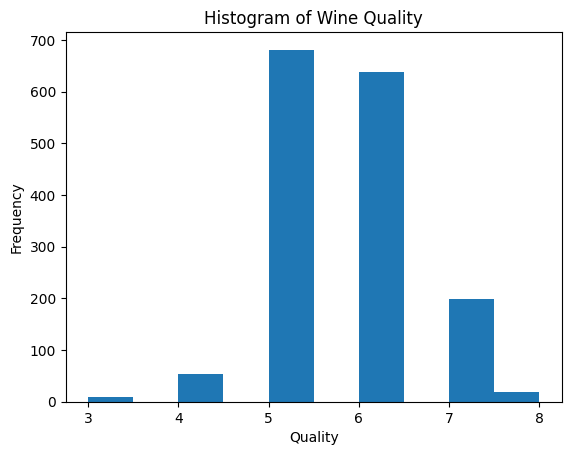

In [8]:

plt.hist(target, bins=10)
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Histogram of Wine Quality")
plt.show()

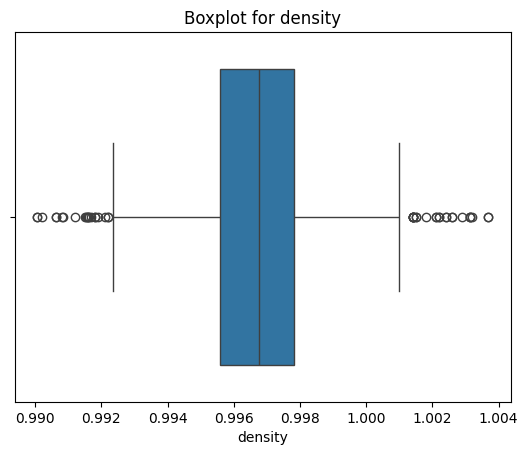

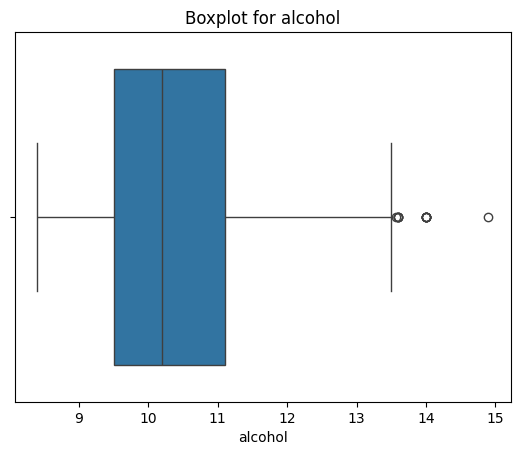

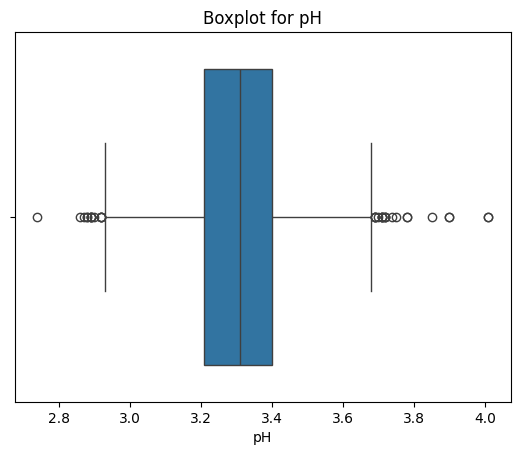

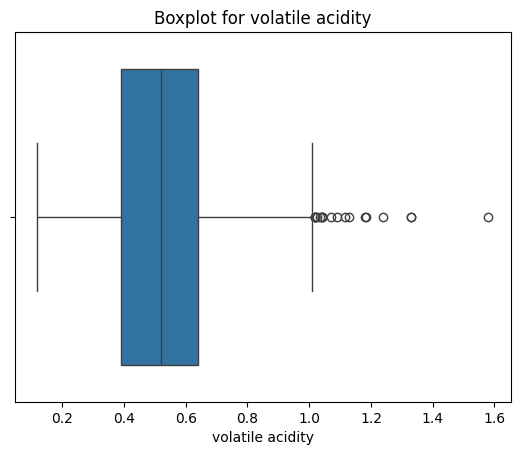

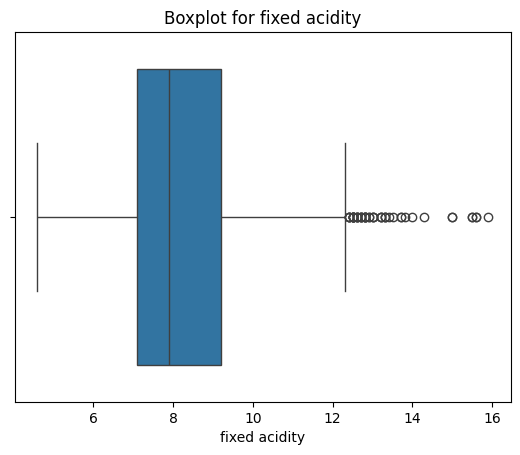

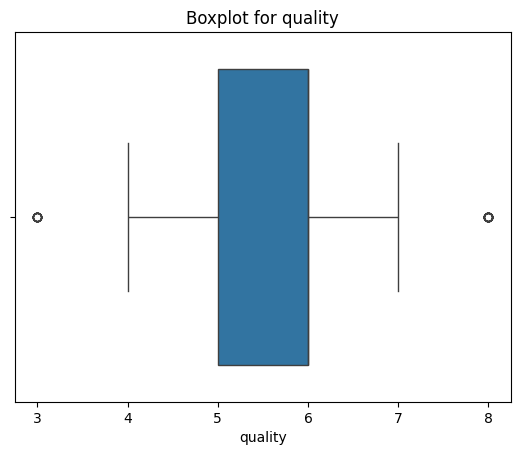

In [9]:
for col in df_filtered.columns:
    plt.title(f"Boxplot for {col}")
    sns.boxplot(data=df[col], orient="h")
    plt.show()

In [10]:
iqr = df_filtered.quantile(0.75) - df_filtered.quantile(0.25)
iqr

,0
density,0.002235
alcohol,1.600000
pH,0.190000
volatile acidity,0.250000
fixed acidity,2.100000
quality,1.000000


In [11]:
thr = iqr * 1.5
len_before = len(df_filtered)
outliers = ((df_filtered > df_filtered.quantile(0.75) + thr) | (df_filtered < df_filtered.quantile(0.25) - thr)).any(axis=1)
df_filtered = df_filtered[~outliers]
df_filtered.head(5)

,density,alcohol,pH,volatile acidity,fixed acidity,quality
0,0.9978,9.4,3.51,0.70,7.4,5
1,0.9968,9.8,3.20,0.88,7.8,5
2,0.9970,9.8,3.26,0.76,7.8,5
3,0.9980,9.8,3.16,0.28,11.2,6
4,0.9978,9.4,3.51,0.70,7.4,5


In [12]:
print(f"There are {(len_before) - len(df_filtered)} outliers in the data.")

There are 145 outliers in the data.


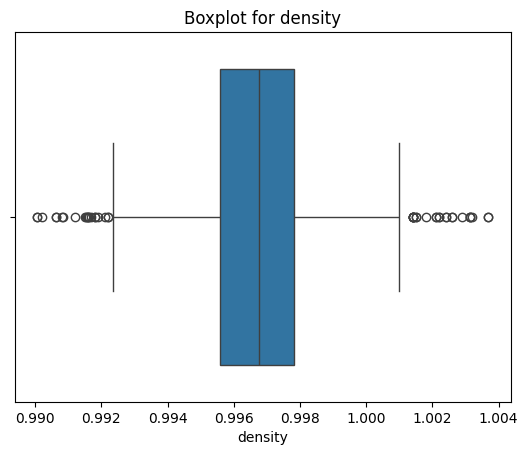

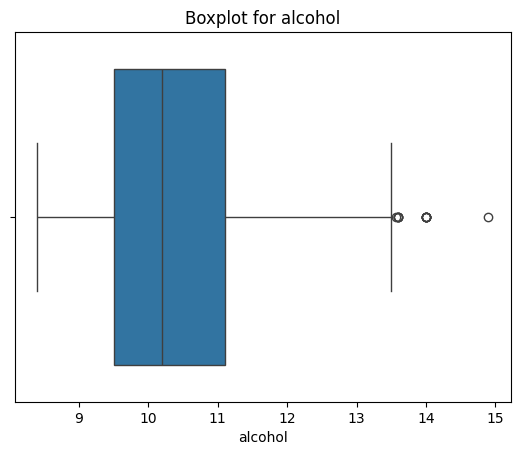

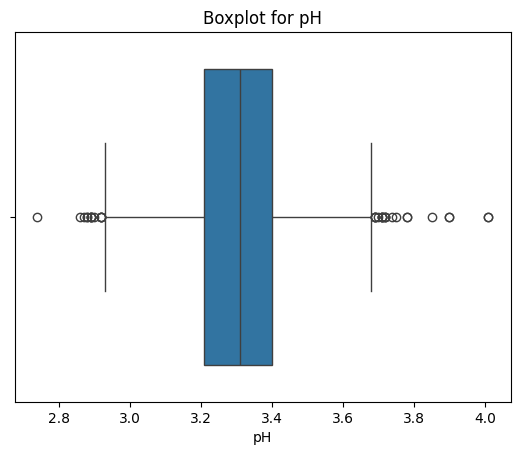

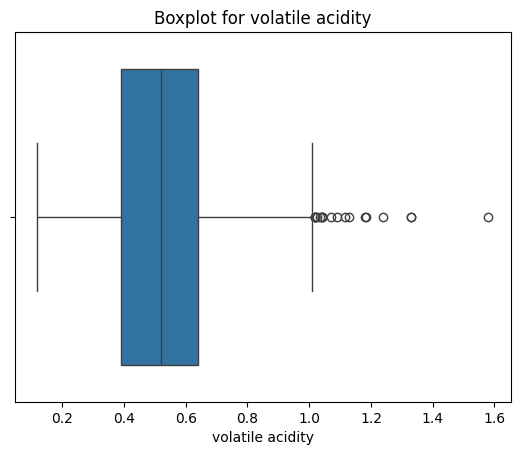

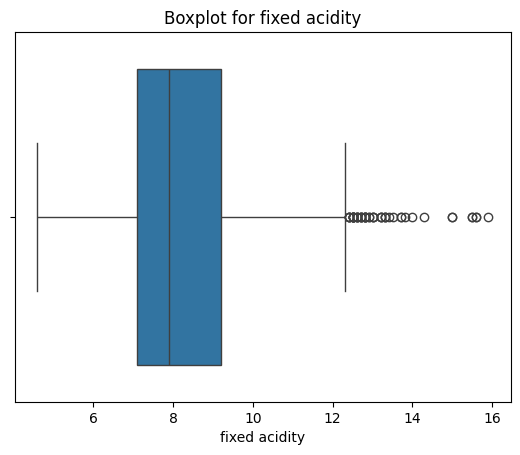

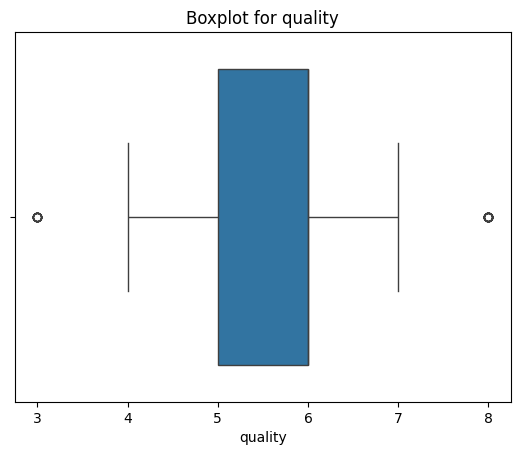

In [13]:
for col in df_filtered.columns:
    plt.title(f"Boxplot for {col}")
    sns.boxplot(data=df[col], orient="h")
    plt.show()

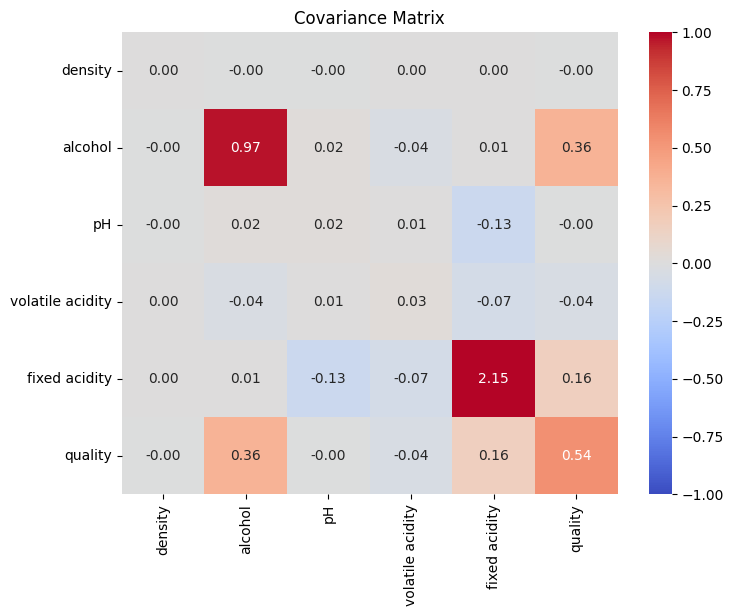

In [14]:
# Step 5: Covariance matrix
cov_matrix = df_filtered.cov()

# Plot the covariance matrix
plt.figure(figsize=(8, 6))

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Covariance Matrix")
plt.show()


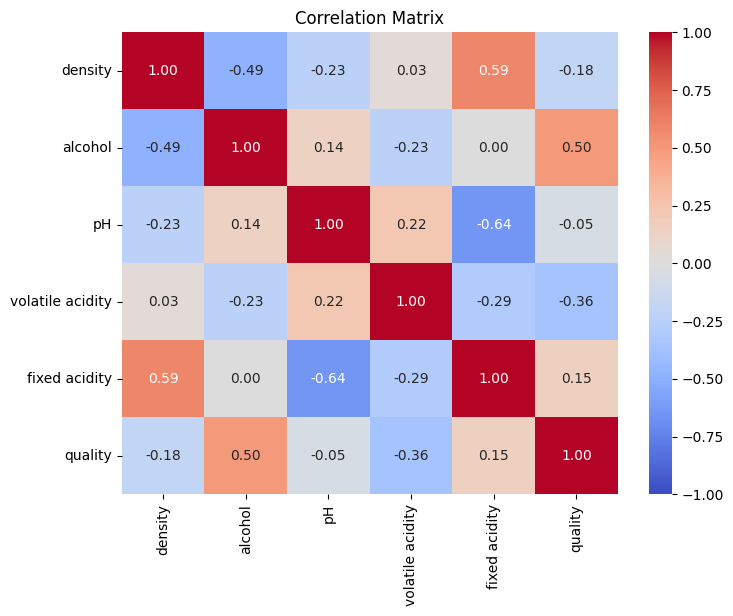

In [15]:
corr_matrix = df_filtered.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


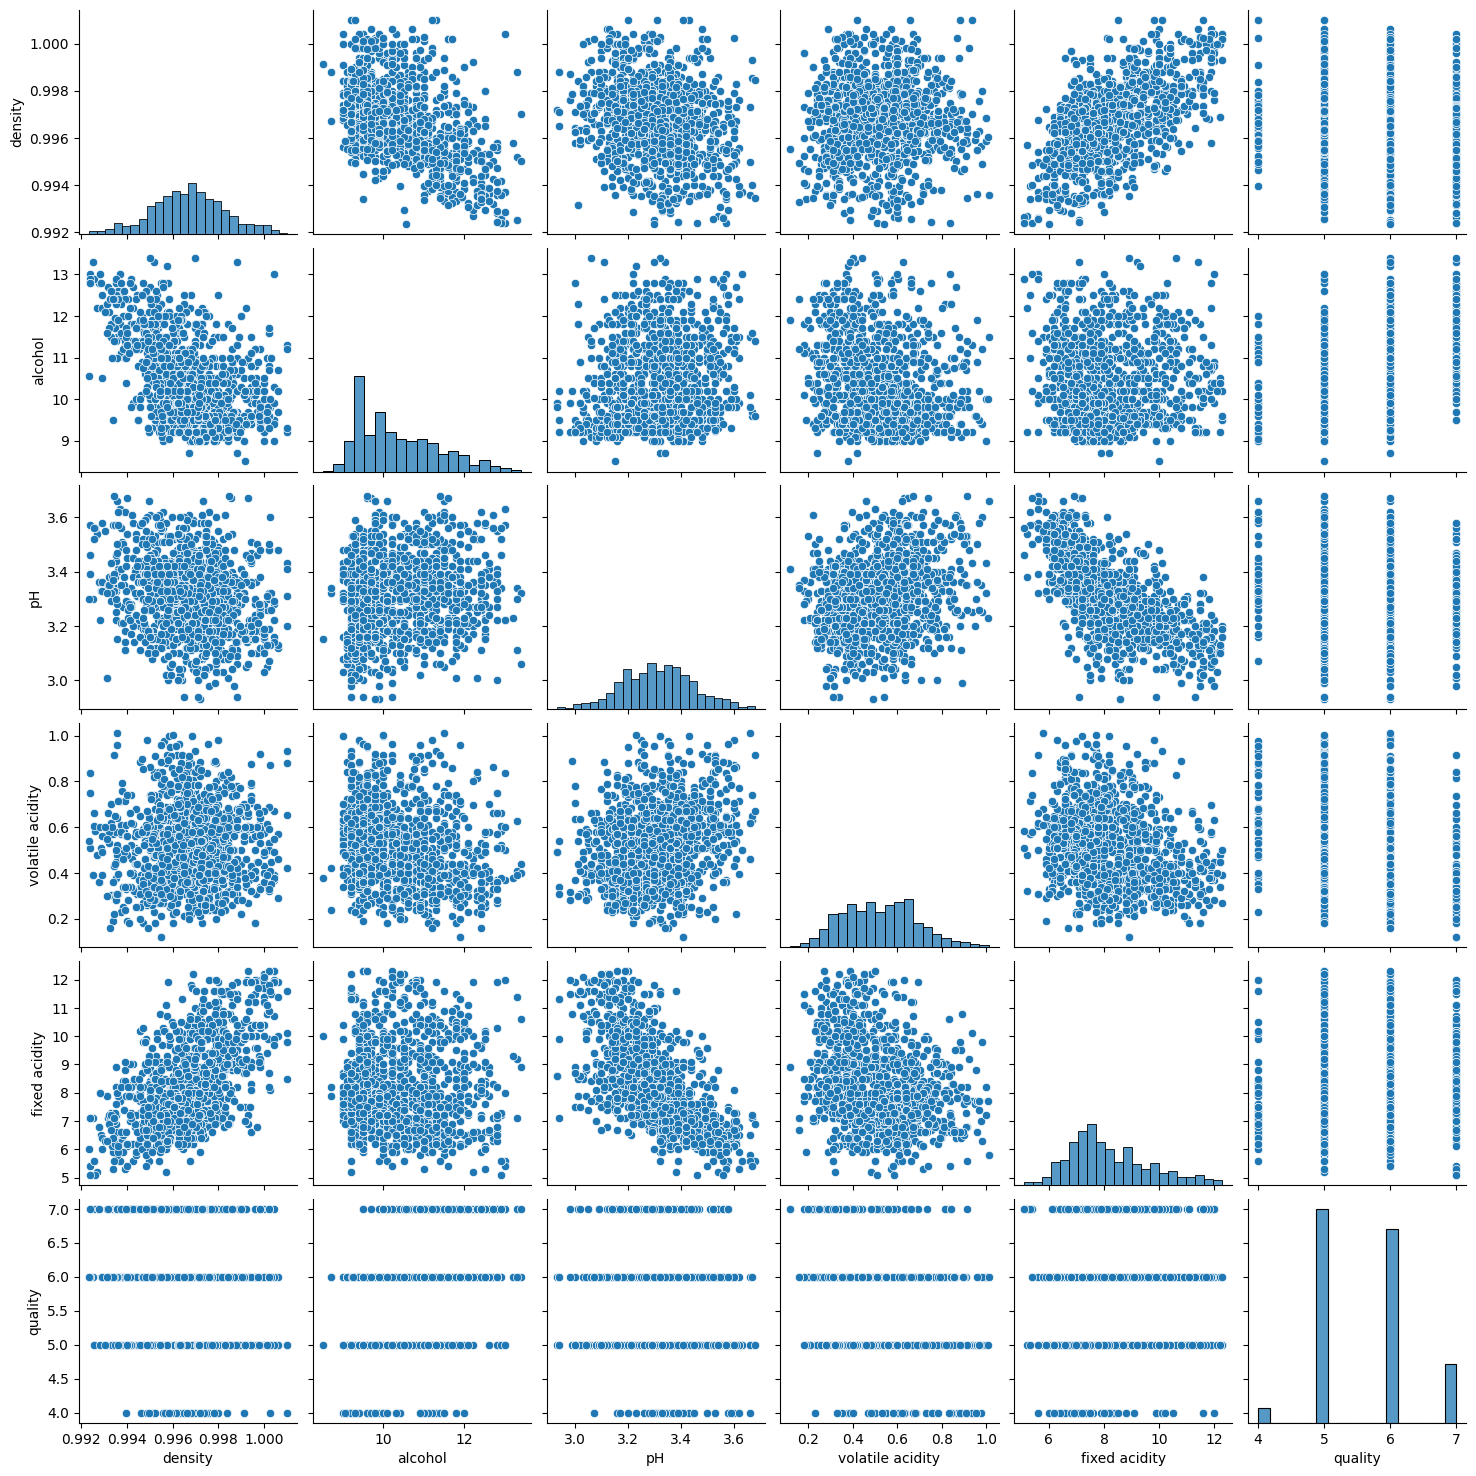

In [16]:
sns.pairplot(df_filtered)
plt.show()

<hr>
<hr>

## Problem 2 (Making a Model)
A social media corporation is experiencing a decline in user engagement over the last few months. One of their team wants to measure the effect of introducing a new feature on the time users interact with their app. The model they want to use has the daily time users spending using their app declining linearly over time, for day $t=0,1,\ldots$. At time $t=40$, they launch the campaign but only for users with a certain test group. They think this could change the slope at time $t=40$ for users within this group (it changes the *slope*, hence would not put a jump discontinuity into the engagement level).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model).

*The point*: as data scientist/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$-s and $y$-s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove.

<hr>
<hr>

**Helper Functions:**

We define the following indicator functions that will be used in the model:

$$
f(t) =
\begin{cases}
1 & \text{if } t \geq 40 \\
0 & \text{if } t < 40
\end{cases}
$$

This function captures whether the time $t$ is after the intervention (i.e., after day $t = 40$).

$$
f(\text{TestGroup}_i) =
\begin{cases}
1 & \text{if the user is in the test group} \\
0 & \text{if the user is not in the test group}
\end{cases}
$$

This function captures whether a user belongs to the test group.

**Linear Model:**

Let $Y_t$ represent the time (in minutes) that a user spends on the app on day $t$. The model can be written as:

$$
Y_t = \beta_0 + \beta_1 t + \beta_2 \cdot f(t) + \beta_3 \cdot f(t) \cdot f(\text{TestGroup}_i) + \epsilon_t
$$

Where:
- $Y_t$: The time a user spends on the app on day $t$.
- $\beta_0$: The intercept, representing the baseline time spent on the app for users in the control group (not in the test group) before the intervention (i.e., before day $t = 40$).
- $\beta_1$: The slope representing the daily decline in app usage time for all users before the intervention (from day $t = 0$ to $t = 39$).
- $f(t)$: A function that is 1 if $t \geq 40$ (after the intervention) and 0 if $t < 40$. This captures the shift in app usage after the intervention at $t = 40$.
- $\beta_2$: The effect of the intervention on users who are not in the test group (the control group). This represents how app usage changes after day 40 for users in the control group.
- $f(\text{TestGroup}_i)$: A function that is 1 if the user is in the test group, and 0 otherwise. It indicates if the user is part of the test group.
- $\beta_3$: The interaction term between the test group and the intervention. This term represents how the slope changes for the test group after the intervention at $t = 40$.
- $\epsilon_t$: The error term at time $t$, accounting for random variation or other factors influencing the app usage.

**Interpretation of Parameters:**

- If $\beta_3 = 0$, it means that the intervention did not affect the test group's rate of decline in time spent on the app (i.e., there is no change in the slope for the test group after day 40).
- If $\beta_2 = 0$, it suggests that the intervention did not change the app usage for the control group, meaning there was no effect for users outside the test group.

**Testing the Impact of the Intervention:**

To test the effectiveness of the intervention, we would look at the statistical significance of $\beta_3$. If $\beta_3$ is significantly different from zero, it implies that the intervention has altered the rate of decline in app usage for the test group after day 40.


## Problem 3 (Linearization trick in Sinusoidal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \cos\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response variable $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?

2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response variable $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?

3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are functions of $(\beta_0, \beta_1, \beta_2)$. Find these functions.

<hr>
<hr>


**Question 3.1**



To check if the model is linear, we examine its form with respect to the given variables.

- Here, $ \beta_0 $ and $ \beta_1 $ are linear coefficients, meaning they are not multiplied by any non-linear functions.
- The issue lies with the term $ \cos(2\pi(x - \beta_2)) $, which is a non-linear function of $ x $ (and depends on $ \beta_2 $). Even if $ \beta_2 $ is a parameter, it still represents a non-linear relationship with $ x $.

Therefore, the model is **not linear** with respect to the variables $ x $ and $ \beta_2 $, as it involves a trigonometric function.

---

**Question 3.2**

The second model is:

$$
\mathbb{E}[Y|X=x] = \beta'_0 + \beta'_1 \sin(2\pi x) + \beta'_2 \cos(2\pi x)
$$

To check if the model is linear, we again examine its form with respect to the variables $ x $ and the parameters $ \beta'_i $.

- The functions $ \sin(2\pi x) $ and $ \cos(2\pi x) $ are linear in the parameters $ \beta'_1 $ and $ \beta'_2 $, meaning the model is linear with respect to both the parameters $ \beta'_0, \beta'_1, \beta'_2 $ and $ x $.

Therefore, the model is **linear** with respect to the parameters $ \beta'_0, \beta'_1, \beta'_2 $, and the model is linear overall.

---

**Question 3.3**

We check if the first model can be expressed in terms of the second model.

Given:

$$
\mathbb{E}[Y|X=x] = \beta_0 + \beta_1 \cos(2\pi(x - \beta_2))
$$

We aim to express it in the form of the second model:

$$
\mathbb{E}[Y|X=x] = \beta'_0 + \beta'_1 \sin(2\pi x) + \beta'_2 \cos(2\pi x)
$$

To do this, expand $ \cos(2\pi(x - \beta_2)) $ using the cosine angle addition identity:

$$
\cos(2\pi(x - \beta_2)) = \cos(2\pi x - 2\pi \beta_2) = \cos(2\pi x) \cos(2\pi \beta_2) + \sin(2\pi x) \sin(2\pi \beta_2)
$$

Now, match the terms of the first and second models and find the relationships between $ \beta_0, \beta_1, \beta_2 $ and $ \beta'_0, \beta'_1, \beta'_2 $:

$$
\beta_0 + \beta_1 [\cos(2\pi x) \cos(2\pi \beta_2) + \sin(2\pi x) \sin(2\pi \beta_2)] = \beta'_0 + \beta'_1 \sin(2\pi x) + \beta'_2 \cos(2\pi x)
$$

Now, equate the coefficients of $ \cos(2\pi x) $ and $ \sin(2\pi x) $:

- Coefficient of $ \cos(2\pi x) $:
$$
\beta_1 \cos(2\pi \beta_2) = \beta'_2
$$
- Coefficient of $ \sin(2\pi x) $:
$$
\beta_1 \sin(2\pi \beta_2) = \beta'_1
$$

Therefore, the first model can be expressed in terms of the second model with the following relationships:

$$
\beta'_2 = \beta_1 \cos(2\pi \beta_2), \quad \beta'_1 = \beta_1 \sin(2\pi \beta_2)
$$

The parameter $ \beta'_0 $ remains unchanged, so:

$$
\beta'_0 = \beta_0
$$



## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor.
3. Plot the response values $y$ and the fitted response $\hat{y} = Z \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies  (using e.g. ``numpy.isclose``):
 - $H = H^\top$
 - $H^2 = H$
 - $\hat{\epsilon}^\top \hat{y} = 0$
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{total} = SS_{fit} + SS_{residual}$, for the sum of squares decomposition

<hr>
<hr>

In [17]:
def fit_least_squares(X, y):
    Z = np.hstack([np.ones((X.shape[0], 1)), X])  # Add constant term

    # Compute beta_hat
    beta_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y

    # Compute fitted values and residuals
    y_hat = Z @ beta_hat
    epsilon_hat = y - y_hat

    # Compute hat matrix
    H = Z @ np.linalg.inv(Z.T @ Z) @ Z.T

    return beta_hat, y_hat, epsilon_hat, H, Z

# Verify least squares properties
def verify_properties(H, y, y_hat, epsilon_hat):
    # Property 1: H is symmetric
    H_symmetric = np.isclose(H, H.T).all()

    # Property 2: H is idempotent
    H_idempotent = np.isclose(H @ H, H).all()

    # Property 3: residuals orthogonal to fitted values
    residuals_orthogonal = np.isclose(epsilon_hat.T @ y_hat, 0)

    # Property 4: eigenvalues are 0 or 1
    eigenvals = np.linalg.eigvals(H)
    eigenvals_binary = np.all(np.isclose(eigenvals, 0) | np.isclose(eigenvals, 1))

    # Property 5: Pythagorean theorem
    pythag = np.isclose(np.sum(y**2), np.sum(epsilon_hat**2) + np.sum(y_hat**2))

    # Property 6: Sum of squares decomposition
    SS_total = np.sum((y - np.mean(y))**2)
    SS_fit = np.sum((y_hat - np.mean(y))**2)
    SS_residual = np.sum(epsilon_hat**2)
    ss_decomp = np.isclose(SS_total, SS_fit + SS_residual)

    return {
        'Is H = H^T?': H_symmetric,
        'Is H^2 = H?': H_idempotent,
        'e.T * y_hat == 0': residuals_orthogonal,
        'eigenvals_binary': eigenvals_binary,
        '||y||^2 == ||e_hat||^2 + ||y_hat||^2': pythag,
        'SS_Tot == SS_Fit + SS_Res': ss_decomp
    }


In [18]:
file_path = './winequality-red.csv'
wine_data = pd.read_csv(file_path, delimiter=";")

y = wine_data['quality'].values
X = wine_data.drop(columns=['quality']).values
feature_names = wine_data.drop(columns=['quality']).columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit least squares
beta_hat, y_hat, epsilon_hat, H, Z = fit_least_squares(X_scaled, y)

# Print coefficients
print("\nRegression Coefficients:")
print(f"{'Intercept':22}: {beta_hat[0]:10.4f}")
for name, coef in zip(feature_names, beta_hat[1:]):
    print(f"{name:22}: {coef:10.4f}")

# Print mean of residuals
print(f"\nMean of residuals: {np.mean(epsilon_hat):.2e}")


Regression Coefficients:
Intercept             :     5.6360
fixed acidity         :     0.0435
volatile acidity      :    -0.1940
citric acid           :    -0.0356
residual sugar        :     0.0230
chlorides             :    -0.0882
free sulfur dioxide   :     0.0456
total sulfur dioxide  :    -0.1074
density               :    -0.0337
pH                    :    -0.0638
sulphates             :     0.1553
alcohol               :     0.2942

Mean of residuals: -2.78e-15


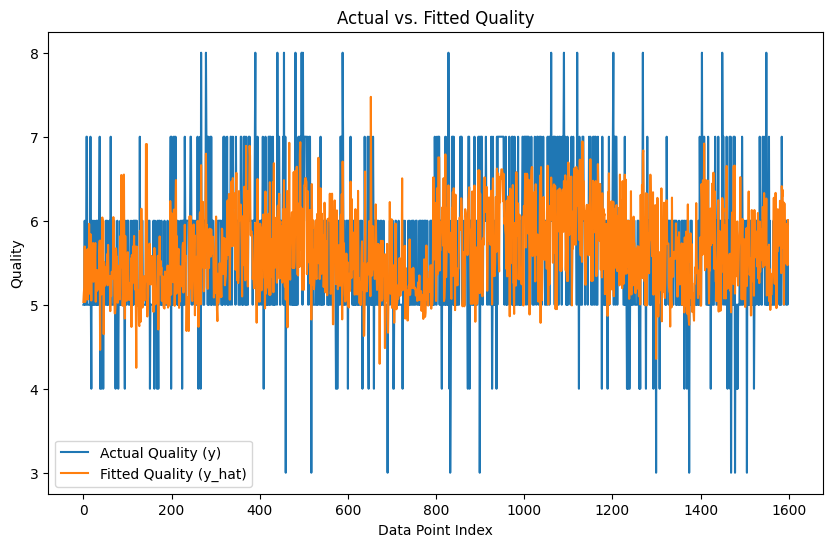

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual Quality (y)')
plt.plot(y_hat, label='Fitted Quality (y_hat)')
plt.xlabel('Data Point Index')
plt.ylabel('Quality')
plt.title('Actual vs. Fitted Quality')
plt.legend()
plt.show()

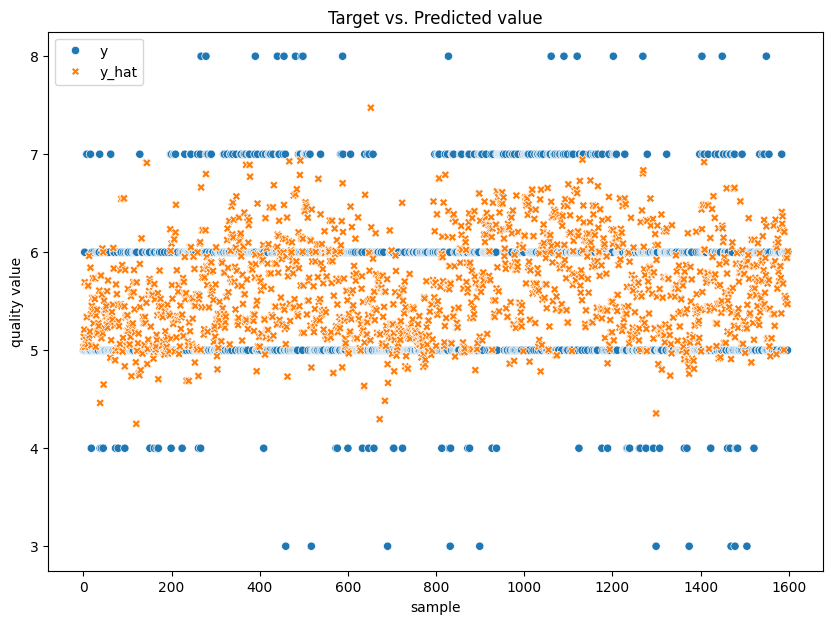

In [20]:
_, ax = plt.subplots(1, figsize=(10, 7))
sns.scatterplot(pd.DataFrame(np.column_stack([y, y_hat]), columns=['y', 'y_hat']), ax=ax)
ax.set(xlabel='sample', ylabel='quality value', title='Target vs. Predicted value');

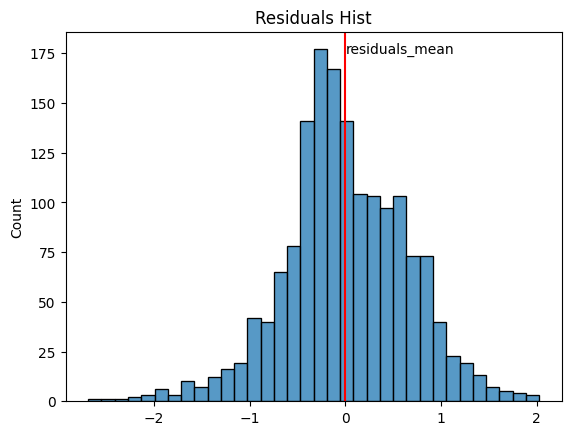

The average of the residuals vector is -0.000


In [21]:
residuals = y - y_hat
residuals_mean = np.mean(residuals)

f, ax = plt.subplots(1, 1)
sns.histplot(residuals, ax=ax)
ax.axvline(x=residuals_mean, color="red")
plt.text(x=residuals_mean, y=175, s="residuals_mean")
plt.title("Residuals Hist")
plt.show()

print(f"The average of the residuals vector is {residuals_mean:.3f}")

In [22]:
# Verify properties
properties = verify_properties(H, y, y_hat, epsilon_hat)
print("\nLeast Squares Properties Verification:")
for prop, result in properties.items():
    print(f"{prop}: {result}")


Least Squares Properties Verification:
Is H = H^T?: True
Is H^2 = H?: True
e.T * y_hat == 0: True
eigenvals_binary: True
||y||^2 == ||e_hat||^2 + ||y_hat||^2: True
SS_Tot == SS_Fit + SS_Res: True


## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the contribution of each coordinate to the loss function. For example, this may be because not all measurements are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize
$$
S(\beta_1,\ldots,\beta_p) :=
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (W\epsilon )^\top (W\epsilon),
$$
where $W = \mathrm{diag}(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate.

1. Write the corresponding Normal Equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$.
3. What is the hat matrix $H$, i.e. the matrix that satisfies $\hat{y} = H y$ with $\hat{y} = \hat{\beta}Z$? (make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix)
4. Show that $H^2 = H$ and $(I-H)^2 = I-H$

<hr>
<hr>

1. $S(\beta) = (\epsilon W)^\top (\epsilon W)$<br>
Since W is diagonal and positive definite $w_i>0$ for all $i=1,\ldots,n$, $W^\top W=W^{2}$, simplifying the expression to: $ = ({y} - {Z} \beta)^\top {W}^2 ({y} - {Z} \beta)$<br>
$\frac{\partial S(\beta)}{\partial \beta} = -2 {Z}^\top {W}^2 ({y} - {Z} \beta) = 0 \Leftrightarrow {Z}^\top {W}^2 {Z} \beta = {Z}^\top {W}^2 {y}$<br>

2. From the normal equations: ${Z}^\top {W}^2 {Z} \beta = {Z}^\top {W}^2 {y}$<br>
and we know Z is full rank and weights are positive ($w_i>0$) so $(Z^\top W^2 Z)$ is invertible<br>
So, the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$ is
$\hat\beta = (Z^\top W^2 Z)^{-1} Z^\top W^2 y$<br>
3. $H = Z(Z^\top W^{2}Z)^{-1}Z^\top W^{2} $<br>
When W is the identity matrix (W=I):<br>
$H = Z (Z^\top Z)^{-1} Z^\top$
4. 1. $H^{2} = [Z(Z^\top W^{2}Z)^{-1}Z^\top W^{2}][Z(Z^\top W^{2}Z)^{-1}Z^\top W^{2}]
   = Z(Z^\top W^{2}Z)^{-1}(Z^\top W^{2}Z)(Z^\top W^{2}Z)^{-1}Z^\top W^{2}
   = Z(Z^\top W^{2}Z)^{-1}Z^\top W^{2}
   = H$
   2. $(I - H)^{2} = (I - H)(I - H)
         = I - 2H + H^{2}
         = I - 2H + H  (since H^{2} = H)
         = I - H$


1. $W=\left(\begin{array}{cccc}
{w_{1}} & 0 & \cdots & 0 \\
0 & {w_{2}} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & {w_{n}}
\end{array}\right)$

2. Using the pseudo-inverse: when $A=ZW$ has linearly independent columns (and thus matrix $A^{T}A$ is invertible), $A^{+}$ is unique (minimized) and can be computed as $ A^{+}=\left(A^{T}A\right)^{-1}A^{T}$<br>
So, the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$ is
$\hat{\beta} = pinv(WZ) \cdot Wy$

## Problem 6 (Pearson Correlation and $R^2$)

The Pearson correlation of two series of real numbers $x=\{x_i\}_{i=1}^n$ and $y=\{y_i\}_{i=1}^n$ is
$$
\hat{\rho}: = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2 } \sqrt{\sum_{i=1}^n y_i^2 } } = \frac{x^\top y}{\|x\|\|y\|}
$$
Consider the coefficient of determination $R^2$ from class in regressing $y$ on $x$ (or $x$ on $y$).
1. Show that $\hat{\rho}^2 = R^2$
2. Find conditions on $x$ and $y$ such that $R^2$ is maximal?


Problem 6 Part 1:<br> <b>Show that  $\hat{\rho}^2 = R^2$</b><br>
$R^{2}$ = SS_fit / SS_total = 1 - (SS_residual / SS_total)<br>

In simple linear regression of y on x, we fit a model of the form: $y = \beta x + \epsilon$<br>
where $\beta = \frac{x^\top y}{x^\top x}$ is the least-squares estimate of the slope, and $\epsilon$ is the residual<br>
The predicted values of y are: $\hat{y} = \beta x = \frac{x^\top y}{x^\top x} x$<br>
SS_fit$ = \|\hat{y}\|^2 = \|\beta x\|^2 = \beta^2 \|x\|^2$<br>
SS_total $= \|y\|^2$<br>
the coefficient of determination $R^{2}$ is:<br>
$R^2 = \frac{SS_fit}{SS_total} = \frac{\|\hat{y}\|^2}{\|y\|^2} = \frac{\beta^2 \|x\|^2}{\|y\|^2}$<br>
From the definition of $\beta$ we have:<br>
$\beta = \frac{x^\top y}{x^\top x} = \frac{x^\top y}{\|x\|^2}$<br>
Substituting $\beta^{2}$ into $R^2$:<br>
$R^2 = \frac{(\frac{x^\top y}{\|x\|^2})^2 \|x\|^2}{\|y\|^2} = \frac{(x^\top y)^2}{\|x\|^2 \|y\|^2}$<br>
The square of the Pearson correlation coefficient $\hat{\rho}$ is:<br>
$\hat{\rho}^2 = \left(\frac{x^\top y}{\|x\| \|y\|}\right)^2 = \frac{(x^\top y)^2}{\|x\|^2 \|y\|^2}$<br>

$\hat{\rho}^2 = \frac{(x^\top y)^2}{\|x\|^2 \|y\|^2} = R^2$<br><br><br>
Problem 6 Part 2:<br>
<b>Find conditions on  x  and  y  such that  R2  is maximal?</b><br>

The square of $\hat{\rho}$ is: $\frac{(x^\top y)^2}{\|x\|^2 \|y\|^2}$<br>
For $\hat{\rho}^2$ to be 1, the numerator and denominator must satisfy
$(x^\top y)^2 = \|x\|^2 \|y\|^2$<br>
This implies that: $|x^\top y| = \|x\| \|y\|$ if and only if x and y are linearly dependent, meaning there exists a scalar $\lambda \in \mathbb{R}$ such that: $y = \lambda x$ or $x = \lambda y$<br>
* The dot product $x^\top y = \|x\| \|y\| \cos\theta$, where $\theta$ is the angle between x and y.
* For $|x^\top y| = \|x\| \|y\|$ the cosine term $\cos\theta = \pm 1$ which means $\theta = 0^\circ$ (vectors point in the same direction) or $\theta = 180^\circ$ (vectors point in opposite directions).
* This happens precisely when x and y are linearly dependent<br><br>

so The coefficient of determination $R^2 = \hat{\rho}^2$ is maximal (equal to 1) when x and y are linearly dependent



Problem 6 Part 1:<br> <b>Show that  $\hat{\rho}^2 = R^2$</b>

$R^{2}$ = SS_fit / SS_total = 1 - (SS_residual / SS_total)<br>

SS terms using x and y:<br>
1. SS_total = $\sum_{i=1}^n (y_i - \bar{y})^2$
2. SS_fit = $\sum_{i=1}^n (\hat{y}_i - \bar{y})^2$
3. SS_residual = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$<br>

Relate $\hat{y}$ to x and y:<br>
1. $\hat{y}_i = \beta_0 + \beta_1 x_i$<br>
<!-- we can show it by Normal equations at the end: -->
(* Normal equations explain at the end):
2. $\beta_0 = \bar{y} - \beta_1 \bar{x}$<br>
3. $\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

SS_fit $=  \sum_{i=1}^n ((\beta_0 + \beta_1 x_i) - \bar{y})^2$ <br> $= \sum_{i=1}^n (\beta_0^2 + 2\beta_0\beta_1 x_i + \beta_1^2 x_i^2 - 2\beta_0\bar{y} - 2\beta_1 x_i\bar{y} + \bar{y}^2)$<br> $= n\beta_0^2 + 2\beta_0\beta_1 \sum_{i=1}^n x_i + \beta_1^2 \sum_{i=1}^n x_i^2 - 2n\beta_0\bar{y} - 2\beta_1 \bar{y} \sum_{i=1}^n x_i + n\bar{y}^2$ <br> $
= n\beta_0^2 + 2n\beta_0\beta_1\bar{x} + \beta_1^2\sum_{i=1}^n x_i^2 - 2n\beta_0\bar{y} - 2n\beta_1\bar{x}\bar{y} + n\bar{y}^2$<br>$= n(\bar{y} - \beta_1\bar{x})^2 + 2n(\bar{y} - \beta_1\bar{x})\beta_1\bar{x} + \beta_1^2\sum_{i=1}^n x_i^2 - 2n(\bar{y} - \beta_1\bar{x})\bar{y} - 2n\beta_1\bar{x}\bar{y} + n\bar{y}^2$<br>$= \beta_1^2\sum_{i=1}^n x_i^2 - 2\beta_1^2\bar{x}\sum_{i=1}^n x_i + n\beta_1^2\bar{x}^2$<br> $= \beta_1^2 (\sum_{i=1}^n x_i^2 - 2\bar{x}\sum_{i=1}^n x_i + n\bar{x}^2)$<br>$= \beta_1^2 \sum_{i=1}^n (x_i - \bar{x})^2$


Relate β₁ to ρ terms using x and y: $\beta_1 = \rho \left(\frac{\sigma_y}{\sigma_x}\right)$

SS_fit $= \rho^2 \frac{\sigma_y^2}{\sigma_x^2} \sum_{i=1}^n (x_i - \bar{x})^2$<br>
$= \rho^2 \sum_{i=1}^n (y_i - \bar{y})^2$<br> $= \rho^2$ SS_total

Final result: <br>
$R^{2}$ = SS_fit / SS_total = ($\rho^2$ SS_total) / SS_total = $\rho^2$


Problem 6 Part 2:<br>
<b>Find conditions on  x  and  y  such that  R2  is maximal?</b><br>
1. $\hat{y}_i = \beta_0 + \beta_1 x_i$
2. The residuals $= \epsilon_i = y_i - \hat{y}_i = y_i - (\beta_0 + \beta_1 x_i)$
3. SS_residual $= \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$
4. Taking partial derivatives:<br>
$\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$<br>
$\beta_0 = \bar{y} - \beta_1 \bar{x}$<br>

6. When the data points lie perfectly on a straight line, the residuals are all zero ($\epsilon_i$ = 0 for all i).
7. In this case, SS_residual = 0, and $R^{2}$ = 1 - (SS_residual / SS_total) = 1 - (0 / SS_total) = 1.
8. Therefore, $R^{2}$ is maximized ($R^{2}$ = 1) when there is a perfect linear relationship between x and y, meaning all the data points lie on a straight line.<br>

To maximize $R^{2}$, we need to maximize the explained variance (SS_fit) and minimize the unexplained variance (SS_residual).
This happens when the points (xi, yi) lie perfectly on a straight line, implying a perfect linear relationship between x and y.


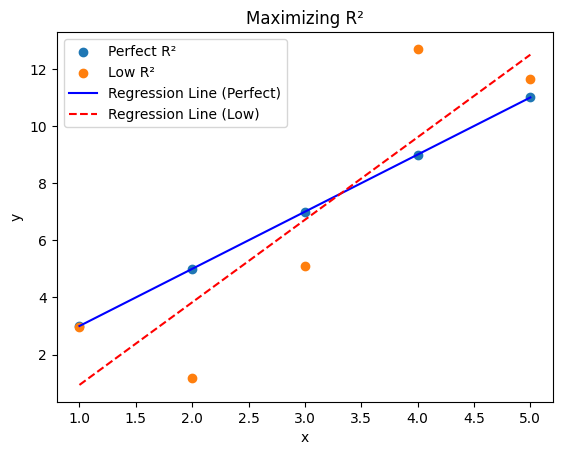

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y_perfect = 2 * x + 1
y_scattered = y_perfect + np.random.normal(0, 2, size=5)

plt.scatter(x, y_perfect, label="Perfect R²")
plt.scatter(x, y_scattered, label="Low R²")

coefficients_p = np.polyfit(x, y_perfect, 1)
regression_line_p = np.polyval(coefficients_p, x)
plt.plot(x, regression_line_p, color='blue', linestyle='-', label="Regression Line (Perfect)")

coefficients = np.polyfit(x, y_scattered, 1)
regression_line = np.polyval(coefficients, x)
plt.plot(x, regression_line, color='red', linestyle='--', label="Regression Line (Low)")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Maximizing R²")

plt.show()

In [24]:
from sklearn.metrics import r2_score

r2_perfect = r2_score(y_perfect, regression_line_p)
print(f"R-squared: {r2_perfect}")

r2_scattered = r2_score(y_scattered, regression_line)
print(f"R-squared: {r2_scattered}")

R-squared: 1.0
R-squared: 0.7775963978508869


(* Normal equations explain)

1.$\frac{\partial(\text{SS}_\text{residual})}{\partial\beta_0} = -2\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))$:<br>
$-2\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i)) = 0$<br>
$\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i)) = 0$<br>
$\sum_{i=1}^n y_i - n\beta_0 - \beta_1 \sum_{i=1}^n x_i = 0$<br>

2.$\frac{\partial(\text{SS}_\text{residual})}{\partial\beta_1} = -2\sum_{i=1}^n x_i(y_i - (\beta_0 + \beta_1 x_i))$:<br>
$-2\sum_{i=1}^n x_i(y_i - (\beta_0 + \beta_1 x_i)) = 0$<br>
$\sum_{i=1}^n x_i(y_i - (\beta_0 + \beta_1 x_i)) = 0$<br>
$\sum_{i=1}^n (x_i y_i - \beta_0 x_i - \beta_1 x_i^2) = 0$<br>
$\sum_{i=1}^n x_i y_i - \beta_0 \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 = 0$<br>

1.$n\beta_0 + \beta_1 \sum_{i=1}^n x_i = \sum_{i=1}^n y_i$<br>
2.$\beta_0 \sum_{i=1}^n x_i + \beta_1 \sum_{i=1}^n x_i^2 = \sum_{i=1}^n x_i y_i$<br>

Solving for $\beta_1$:

Multiply equation (1) by $\sum_{i=1}^n x_i$: $n\beta_0 \sum_{i=1}^n x_i + \beta_1 \left(\sum_{i=1}^n x_i\right)^2 = \left(\sum_{i=1}^n y_i\right) \left(\sum_{i=1}^n x_i\right)$

Multiply equation (2) by $n$: $n\beta_0 \sum_{i=1}^n x_i + n\beta_1 \sum_{i=1}^n x_i^2 = n\sum_{i=1}^n x_i y_i$

Subtract the modified equation (1) from the modified equation (2): $\left[ n\beta_0 \sum_{i=1}^n x_i + n\beta_1 \sum_{i=1}^n x_i^2 \right] - \left[ n\beta_0 \sum_{i=1}^n x_i + \beta_1 \left(\sum_{i=1}^n x_i\right)^2 \right] = \left[ n\sum_{i=1}^n x_i y_i \right] - \left[ \left(\sum_{i=1}^n y_i\right) \left(\sum_{i=1}^n x_i\right) \right]$

Simplify: $n\beta_1 \sum_{i=1}^n x_i^2 - \beta_1 \left(\sum_{i=1}^n x_i\right)^2 = n\sum_{i=1}^n x_i y_i - \left(\sum_{i=1}^n y_i\right) \left(\sum_{i=1}^n x_i\right)$

Factor out $\beta_1$: $\beta_1 \left( n\sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i\right)^2 \right) = n\sum_{i=1}^n x_i y_i - \left(\sum_{i=1}^n y_i\right) \left(\sum_{i=1}^n x_i\right)$

Solve for $\beta_1$: $\beta_1 = \frac{n\sum_{i=1}^n x_i y_i - \left(\sum_{i=1}^n y_i\right) \left(\sum_{i=1}^n x_i\right)}{n\sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i\right)^2}$

Solving for $\beta_0$:

Substitute the expression for β₁ into equation (1): $n\beta_0 + \frac{n\sum_{i=1}^n x_i y_i - \left(\sum_{i=1}^n y_i\right) \left(\sum_{i=1}^n x_i\right)}{n\sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i\right)^2} \sum_{i=1}^n x_i = \sum_{i=1}^n y_i$

Solve for $\beta_0$: $\beta_0 = \frac{\sum_{i=1}^n y_i - \beta_1 \sum_{i=1}^n x_i}{n}$

Simplifying the expressions:

The expressions for $\beta_1$ and $\beta_0$ can be further simplified using the following relationships:

$\sum_{i=1}^n (x_i - \bar{x})^2 = \sum_{i=1}^n x_i^2 - \frac{\left(\sum_{i=1}^n x_i\right)^2}{n}$<br>
$\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) = \sum_{i=1}^n x_i y_i - \frac{\left(\sum_{i=1}^n x_i\right) \left(\sum_{i=1}^n y_i\right)}{n}$<br>
Substituting these relationships into the expressions for $\beta_1$ and $\beta_0$, we get:

$\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$<br>

$\beta_0 = \bar{y} - \beta_1 \bar{x}$<br>

Where:

$\bar{x}$ is the mean of x values
$\bar{y}$ is the mean of y values


<hr>
<hr>